In [5]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping


# utility libraries
import os
import time
import itertools

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_MobileNetV2.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.2
best_batch_size	= 64
best_epochs	= 5


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = Dropout(best_dropout)(x)

# final softmax probabilistic classification layer
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



Found 6090 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Epoch 1/5


/Users/keeganveazey/Desktop/ds_capstone/BugBot/bugbot_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 164ms/step - accuracy: 0.4376 - loss: 1.7464 - val_accuracy: 0.6432 - val_loss: 1.0835
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 160ms/step - accuracy: 0.7765 - loss: 0.7043 - val_accuracy: 0.6591 - val_loss: 1.0372
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 163ms/step - accuracy: 0.8247 - loss: 0.5339 - val_accuracy: 0.6750 - val_loss: 1.0020
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 161ms/step - accuracy: 0.8710 - loss: 0.4324 - val_accuracy: 0.6818 - val_loss: 1.0055
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 161ms/step - accuracy: 0.8876 - loss: 0.3680 - val_accuracy: 0.6795 - val_loss: 1.0005


# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.744186,0.800000,0.771084,40.000000
american_house_spider,0.625000,0.625000,0.625000,40.000000
bedbug,0.586957,0.675000,0.627907,40.000000
brown_stink_bug,0.866667,0.650000,0.742857,40.000000
carpenter_ant,0.574074,0.775000,0.659574,40.000000
cellar_spider,0.852941,0.725000,0.783784,40.000000
flea,0.466667,0.525000,0.494118,40.000000
house_centipede,0.885714,0.775000,0.826667,40.000000
silverfish,0.769231,0.750000,0.759494,40.000000
subterranean_termite,0.515152,0.425000,0.465753,40.000000


<Figure size 800x600 with 0 Axes>

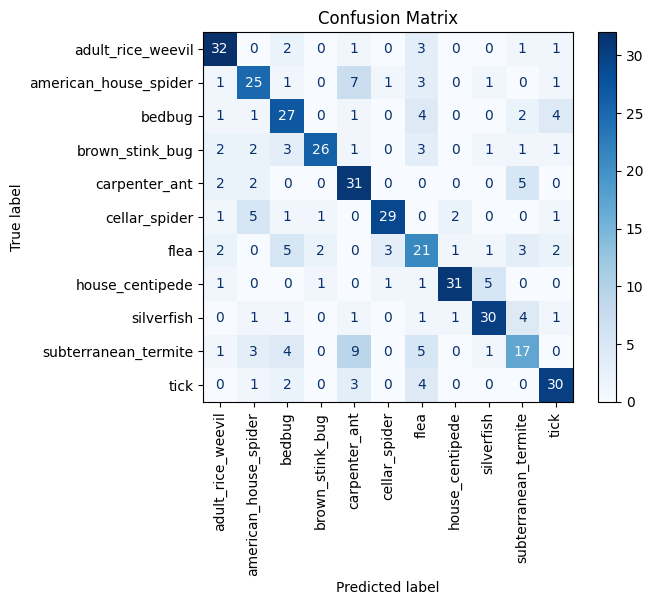

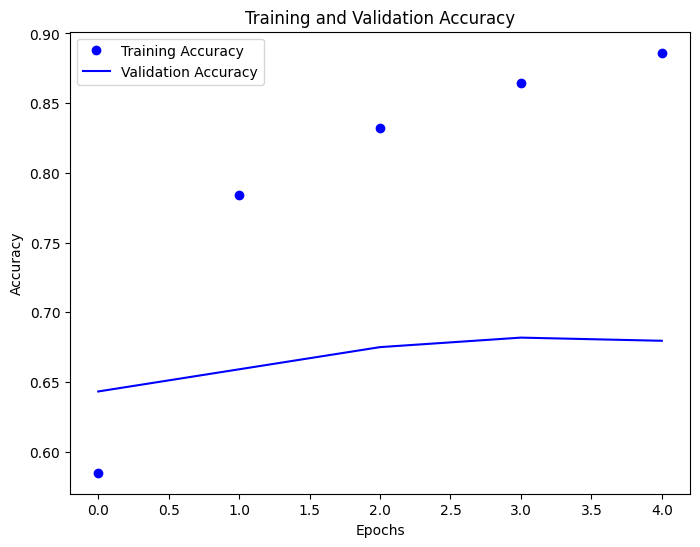

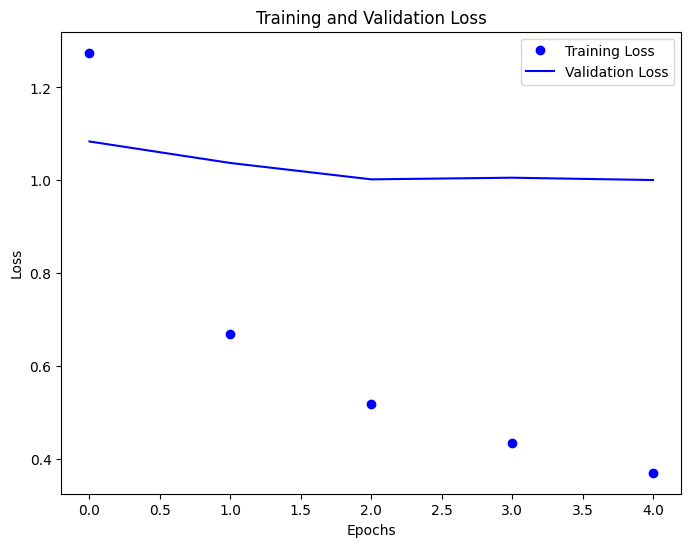

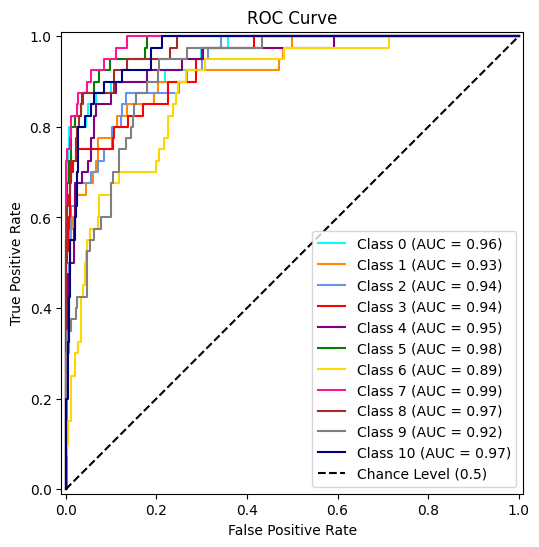

Macro-averaged One-vs-One ROC AUC score: 0.95
Accuracy: 0.680
Precision: 0.693
Recall: 0.68
F1 Score: 0.682


{'accuracy': 0.68,
 'precision': 0.693,
 'recall': 0.68,
 'f1_score': 0.682,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.744186  0.800000  0.771084   40.000000
 american_house_spider   0.625000  0.625000  0.625000   40.000000
 bedbug                  0.586957  0.675000  0.627907   40.000000
 brown_stink_bug         0.866667  0.650000  0.742857   40.000000
 carpenter_ant           0.574074  0.775000  0.659574   40.000000
 cellar_spider           0.852941  0.725000  0.783784   40.000000
 flea                    0.466667  0.525000  0.494118   40.000000
 house_centipede         0.885714  0.775000  0.826667   40.000000
 silverfish              0.769231  0.750000  0.759494   40.000000
 subterranean_termite    0.515152  0.425000  0.465753   40.000000
 tick                    0.731707  0.750000  0.740741   40.000000
 accuracy                0.679545  0.679545  0.679545    0.679545
 macro avg               0.692572  0.

In [10]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics: accuracy': 0.68,'precision': 0.693,'recall': 0.68,'f1_score': 0.682

# Test plots

/Users/keeganveazey/Desktop/ds_capstone/BugBot/bugbot_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,1.000000,0.650000,0.787879,20.000000
american_house_spider,1.000000,0.650000,0.787879,20.000000
bedbug,0.550000,0.550000,0.550000,20.000000
brown_stink_bug,0.750000,0.900000,0.818182,20.000000
carpenter_ant,0.666667,0.800000,0.727273,20.000000
cellar_spider,0.894737,0.850000,0.871795,20.000000
flea,0.406250,0.650000,0.500000,20.000000
house_centipede,0.947368,0.900000,0.923077,20.000000
silverfish,0.933333,0.700000,0.800000,20.000000
subterranean_termite,0.666667,0.600000,0.631579,20.000000


<Figure size 800x600 with 0 Axes>

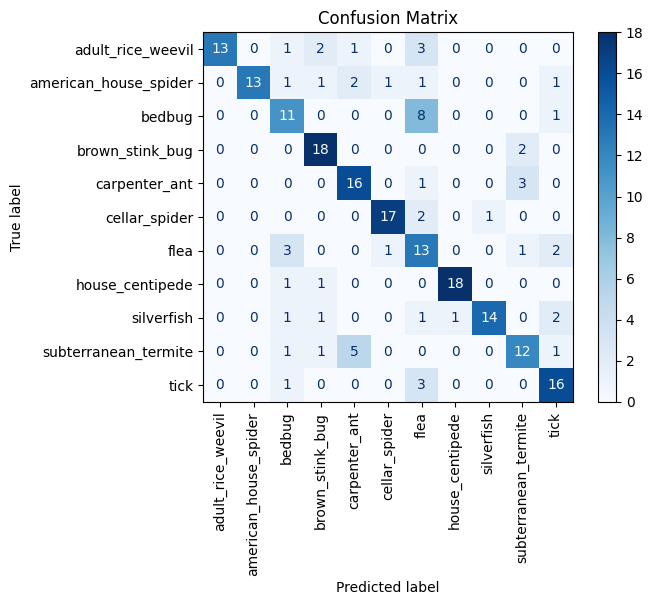

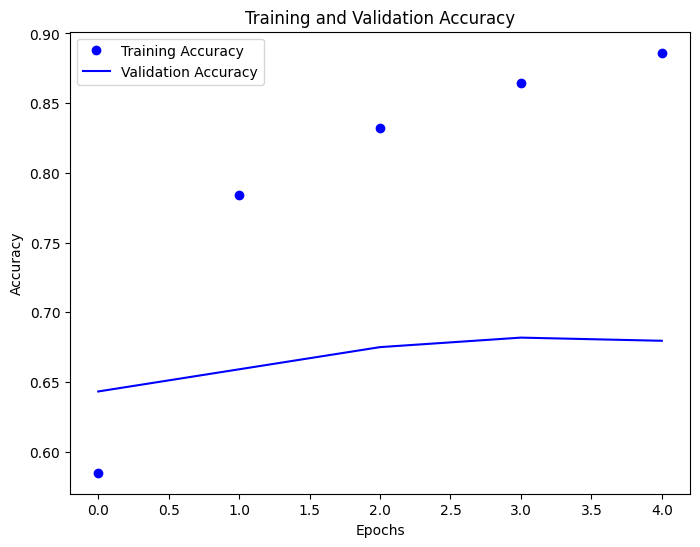

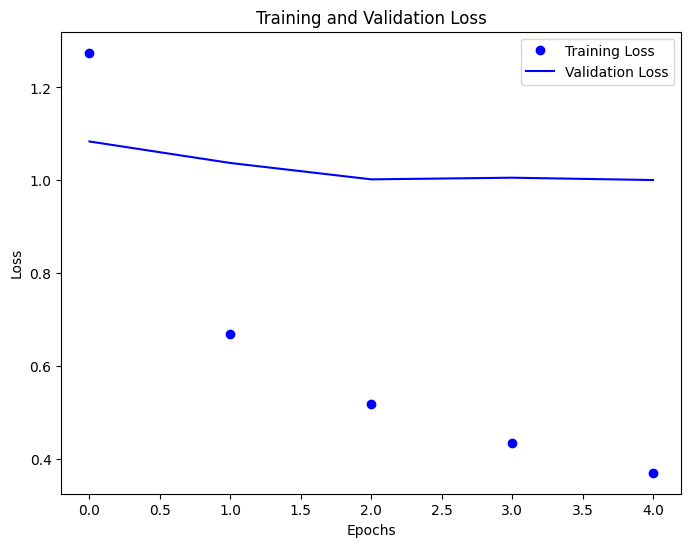

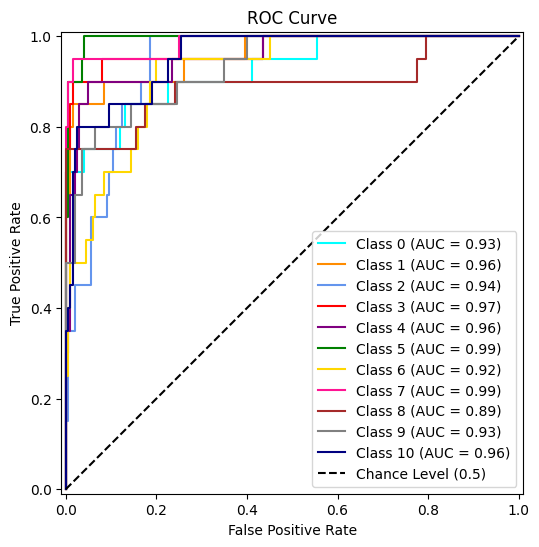

Macro-averaged One-vs-One ROC AUC score: 0.95
Accuracy: 0.732
Precision: 0.774
Recall: 0.732
F1 Score: 0.74


{'accuracy': 0.732,
 'precision': 0.774,
 'recall': 0.732,
 'f1_score': 0.74,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       1.000000  0.650000  0.787879   20.000000
 american_house_spider   1.000000  0.650000  0.787879   20.000000
 bedbug                  0.550000  0.550000  0.550000   20.000000
 brown_stink_bug         0.750000  0.900000  0.818182   20.000000
 carpenter_ant           0.666667  0.800000  0.727273   20.000000
 cellar_spider           0.894737  0.850000  0.871795   20.000000
 flea                    0.406250  0.650000  0.500000   20.000000
 house_centipede         0.947368  0.900000  0.923077   20.000000
 silverfish              0.933333  0.700000  0.800000   20.000000
 subterranean_termite    0.666667  0.600000  0.631579   20.000000
 tick                    0.695652  0.800000  0.744186   20.000000
 accuracy                0.731818  0.731818  0.731818    0.731818
 macro avg               0.773698  0

In [11]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.732, 'precision': 0.774, 'recall': 0.732,'f1_score': 0.74